### Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plot_series(time, series, format = '-', start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)
    
def trend(time, slope = 0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time * 2 * np.pi),
                   1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level = 1, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

### Trend and Seasonality

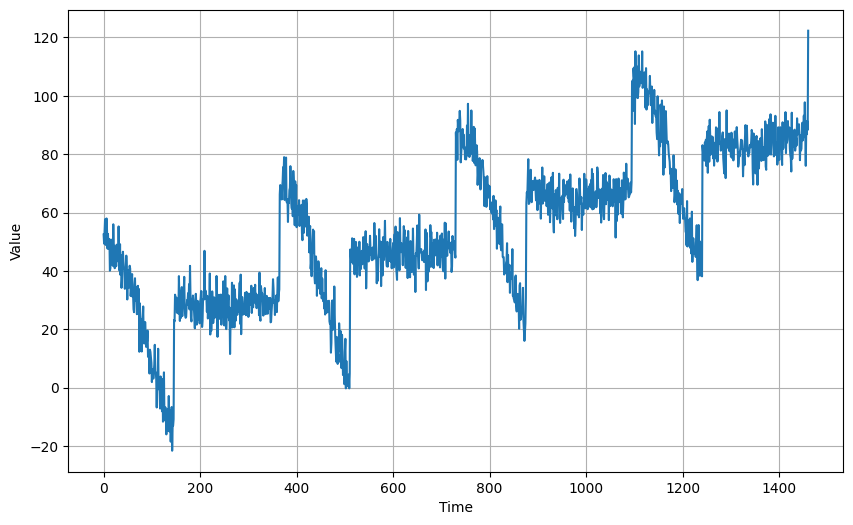

In [10]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40

series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

series += noise

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

Splitting

In [12]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

### Naive Forecast

In [29]:
print(f"Series: {series[-10:]}", end = '\n\n')
# split_time - 1 == 999
naive_forecast = series[split_time - 1: -1]
print("Naive forecast: {}".format(naive_forecast[-10:]))
len(naive_forecast)

Series: [ 93.20545813  85.93059647  97.76783699  87.61970299  76.02121565
  88.62475241  86.79699012  91.37325376  88.32382529 122.30772008]

Naive forecast: [86.20624617 93.20545813 85.93059647 97.76783699 87.61970299 76.02121565
 88.62475241 86.79699012 91.37325376 88.32382529]


461

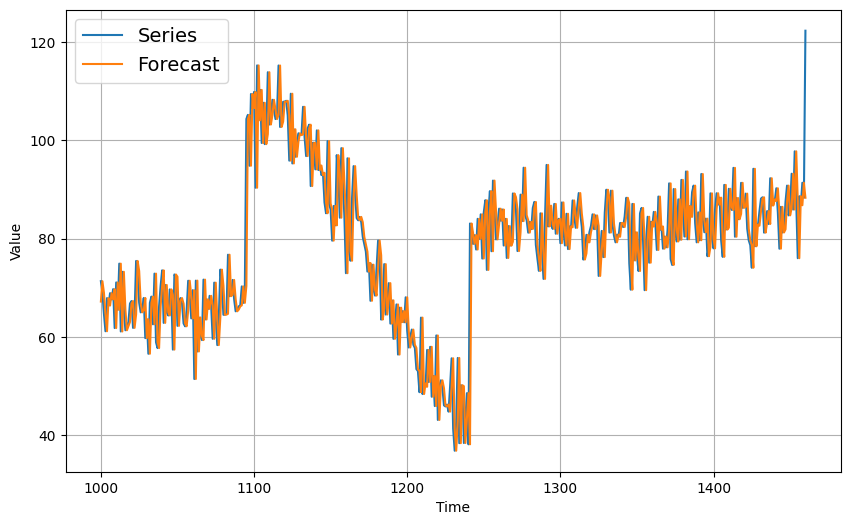

In [30]:
plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid, label = 'Series')
plot_series(time_valid, naive_forecast, label = "Forecast")